In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import geopandas as gpd
import folium as fl
from folium.plugins import HeatMap, HeatMapWithTime
import matplotlib.pyplot as plt
import seaborn as sns
import os
from warnings import filterwarnings

filterwarnings('ignore')

In [2]:
# First we'll retrieve all the relevant csv files from the directory.
# Than we'll create a list of dataframes (one for each file) and concatenate
# them together in order to work on all the data at once.

data_files = os.listdir('csse_covid_19_data/csse_covid_19_daily_reports')
data_files = pd.Series(data_files, name='Data')
data_files = data_files[data_files.str.contains('.csv')]
data_files = data_files.sort_values()
data_files.head()

37    01-22-2020.csv
38    01-23-2020.csv
52    01-24-2020.csv
51    01-25-2020.csv
27    01-26-2020.csv
Name: Data, dtype: object

In [3]:
data_files.tail()

43    03-19-2020.csv
57    03-20-2020.csv
58    03-21-2020.csv
22    03-22-2020.csv
21    03-23-2020.csv
Name: Data, dtype: object

In [4]:
df_all = [pd.read_csv(f'csse_covid_19_data/csse_covid_19_daily_reports/{csv_file}') for csv_file in data_files]
len(df_all)

62

In [5]:
df = pd.concat(df_all)
df.reset_index(drop=True, inplace=True)
df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11336,NaN,NaN,NaN,46.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Uzbekistan,2020-03-23 23:19:21,41.377491,64.585262,46.0,Uzbekistan
11337,NaN,NaN,NaN,77.0,0.0,15.0,NaN,NaN,NaN,NaN,NaN,Venezuela,2020-03-23 23:19:21,6.423800,-66.589700,62.0,Venezuela
11338,NaN,NaN,NaN,123.0,0.0,17.0,NaN,NaN,NaN,NaN,NaN,Vietnam,2020-03-23 23:19:21,14.058324,108.277199,106.0,Vietnam
11339,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Zambia,2020-03-23 23:19:21,-13.133897,27.849332,3.0,Zambia


In [6]:
df['Last Update'] = pd.to_datetime(df['Last Update'])

df['Date Last Updated'] = df['Last Update'].dt.date
df['Time Last Updated'] = df['Last Update'].dt.time

df = df[['Province/State', 'Country/Region', 'Date Last Updated', 'Time Last Updated' ,'Confirmed', 'Deaths', 'Recovered', 'Latitude', 'Longitude']]
df

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Anhui,Mainland China,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,2020-01-22,17:00:00,14.0,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,2020-01-22,17:00:00,6.0,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,2020-01-22,17:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11336,NaN,NaN,NaN,NaN,46.0,0.0,0.0,NaN,NaN
11337,NaN,NaN,NaN,NaN,77.0,0.0,15.0,NaN,NaN
11338,NaN,NaN,NaN,NaN,123.0,0.0,17.0,NaN,NaN
11339,NaN,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN


In [7]:
df.isnull().sum()

Province/State       6848
Country/Region       3415
Date Last Updated    3415
Time Last Updated    3415
Confirmed              19
Deaths                441
Recovered             388
Latitude             6233
Longitude            6233
dtype: int64

In [8]:
world_wide = df.groupby('Date Last Updated').sum().copy()
world_wide.drop(columns=['Latitude', 'Longitude'], inplace=True)
# world_wide.reset_index(inplace=True)
world_wide.head()

,Confirmed,Deaths,Recovered
Date Last Updated,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [9]:
world_wide.isnull().sum()

Confirmed    0
Deaths       0
Recovered    0
dtype: int64

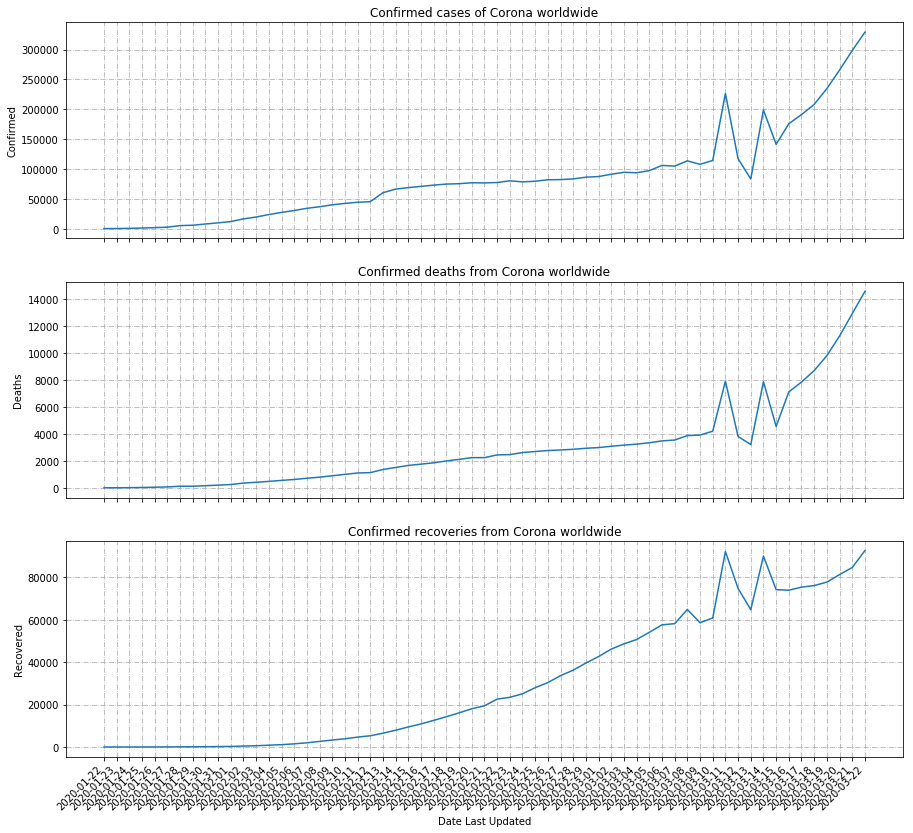

In [10]:
fig, axes = plt.subplots(3,1, figsize=(15,15))
fig.autofmt_xdate(rotation=45)

sns.lineplot(x=world_wide.index, y='Confirmed', data=world_wide, ax=axes[0])
axes[0].xaxis.set_ticks(world_wide.index)
axes[0].set_title('Confirmed cases of Corona worldwide')
axes[0].grid(linestyle='-.')

sns.lineplot(x=world_wide.index, y='Deaths', data=world_wide, ax=axes[1])
axes[1].xaxis.set_ticks(world_wide.index)
axes[1].set_title('Confirmed deaths from Corona worldwide')
axes[1].grid(linestyle='-.')

sns.lineplot(x=world_wide.index, y='Recovered', data=world_wide, ax=axes[2])
axes[2].xaxis.set_ticks(world_wide.index);
axes[2].set_title('Confirmed recoveries from Corona worldwide')
axes[2].grid(linestyle='-.');

## Track the growth by country

In [11]:
country_counts = df['Country/Region'].value_counts().to_dict()

for country in sorted(country_counts.keys()):
    print(country, country_counts[country])

 Azerbaijan 1
Afghanistan 28
Albania 14
Algeria 27
Andorra 21
Angola 3
Antigua and Barbuda 10
Argentina 20
Armenia 22
Aruba 7
Australia 323
Austria 27
Azerbaijan 22
Bahamas, The 4
Bahrain 28
Bangladesh 15
Barbados 6
Belarus 24
Belgium 48
Benin 7
Bhutan 17
Bolivia 12
Bosnia and Herzegovina 18
Brazil 27
Brunei 14
Bulgaria 15
Burkina Faso 13
Cabo Verde 3
Cambodia 56
Cameroon 17
Canada 254
Cape Verde 2
Cayman Islands 3
Central African Republic 8
Chad 4
Channel Islands 1
Chile 20
China 396
Colombia 18
Congo (Brazzaville) 8
Congo (Kinshasa) 12
Costa Rica 17
Cote d'Ivoire 12
Croatia 27
Cruise Ship 12
Cuba 11
Curacao 2
Cyprus 14
Czech Republic 10
Czechia 12
Denmark 41
Djibouti 5
Dominica 1
Dominican Republic 22
East Timor 2
Ecuador 22
Egypt 38
El Salvador 4
Equatorial Guinea 8
Eritrea 2
Estonia 25
Eswatini 9
Ethiopia 10
Faroe Islands 7
Fiji 4
Finland 54
France 127
French Guiana 15
Gabon 9
Gambia, The 5
Georgia 26
Germany 55
Ghana 9
Gibraltar 7
Greece 26
Greenland 7
Grenada 1
Guadeloupe 10
Guam

In [12]:
US = df[df['Country/Region']  == 'US']
US

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude
31,Washington,US,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN
69,Washington,US,2020-01-23,17:00:00,1.0,NaN,NaN,NaN,NaN
117,Washington,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN
118,Chicago,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN
158,Washington,US,2020-01-25,17:00:00,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7823,Alaska,US,2020-03-22,15:43:06,21.0,0.0,0.0,61.3707,-152.4044
7824,South Dakota,US,2020-03-22,20:13:40,21.0,1.0,0.0,44.2998,-99.4388
7845,West Virginia,US,2020-03-22,03:13:24,12.0,0.0,0.0,38.4912,-80.9545
7854,United States Virgin Islands,US,2020-03-21,17:43:03,6.0,0.0,0.0,18.3358,-64.8963


In [13]:
US = gpd.GeoDataFrame(US, geometry=gpd.points_from_xy(US['Longitude'], US['Latitude']))
US.crs = {'init' :'epsg:4326'}
US

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude,geometry
31,Washington,US,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
69,Washington,US,2020-01-23,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
117,Washington,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
118,Chicago,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
158,Washington,US,2020-01-25,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
...,...,...,...,...,...,...,...,...,...,...
7823,Alaska,US,2020-03-22,15:43:06,21.0,0.0,0.0,61.3707,-152.4044,POINT (-152.404 61.371)
7824,South Dakota,US,2020-03-22,20:13:40,21.0,1.0,0.0,44.2998,-99.4388,POINT (-99.439 44.300)
7845,West Virginia,US,2020-03-22,03:13:24,12.0,0.0,0.0,38.4912,-80.9545,POINT (-80.954 38.491)
7854,United States Virgin Islands,US,2020-03-21,17:43:03,6.0,0.0,0.0,18.3358,-64.8963,POINT (-64.896 18.336)


In [14]:
US = US[~US['Province/State'].isin(['Puerto Rico', 'Virgin Islands, U.S.'])]
US

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude,geometry
31,Washington,US,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
69,Washington,US,2020-01-23,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
117,Washington,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
118,Chicago,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
158,Washington,US,2020-01-25,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
...,...,...,...,...,...,...,...,...,...,...
7823,Alaska,US,2020-03-22,15:43:06,21.0,0.0,0.0,61.3707,-152.4044,POINT (-152.404 61.371)
7824,South Dakota,US,2020-03-22,20:13:40,21.0,1.0,0.0,44.2998,-99.4388,POINT (-99.439 44.300)
7845,West Virginia,US,2020-03-22,03:13:24,12.0,0.0,0.0,38.4912,-80.9545,POINT (-80.954 38.491)
7854,United States Virgin Islands,US,2020-03-21,17:43:03,6.0,0.0,0.0,18.3358,-64.8963,POINT (-64.896 18.336)


In [15]:
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us_states = gpd.read_file('US_map.json')
us_states.tail()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
47,0400000US53,53,Washington,,66455.521,"MULTIPOLYGON (((-122.51954 48.28831, -122.5227..."
48,0400000US54,54,West Virginia,,24038.210,"POLYGON ((-80.07595 39.72135, -79.91617 39.720..."
49,0400000US55,55,Wisconsin,,54157.805,"MULTIPOLYGON (((-90.40331 47.02669, -90.40332 ..."
50,0400000US56,56,Wyoming,,97093.141,"POLYGON ((-110.04848 40.99755, -110.12164 40.9..."
51,0400000US72,72,Puerto Rico,,3423.775,"MULTIPOLYGON (((-65.32770 18.29584, -65.33745 ..."


In [16]:
us_states = us_states[us_states['NAME'].isin(['Puerto Rico']) == False]
us_states.tail()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
46,0400000US51,51,Virginia,,39490.086,"MULTIPOLYGON (((-75.97361 37.83582, -75.97171 ..."
47,0400000US53,53,Washington,,66455.521,"MULTIPOLYGON (((-122.51954 48.28831, -122.5227..."
48,0400000US54,54,West Virginia,,24038.210,"POLYGON ((-80.07595 39.72135, -79.91617 39.720..."
49,0400000US55,55,Wisconsin,,54157.805,"MULTIPOLYGON (((-90.40331 47.02669, -90.40332 ..."
50,0400000US56,56,Wyoming,,97093.141,"POLYGON ((-110.04848 40.99755, -110.12164 40.9..."


In [17]:
us_states.NAME

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma
3

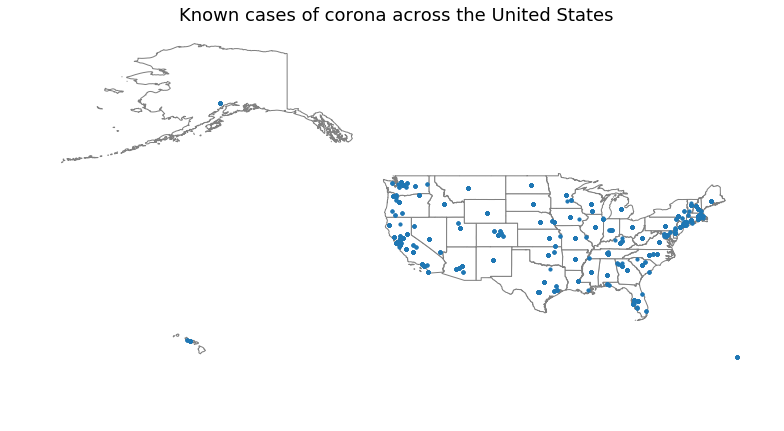

In [18]:
ax = us_states.plot(figsize=(20,7), color='white', edgecolor='gray')
ax.set_xlim([-185, -60])
ax.set_title('Known cases of corona across the United States', fontsize=18)
ax.set_axis_off()
US.plot(ax=ax, markersize=10)
plt.show()

In [19]:
# Use this function to make sure every web-browser 
# can display the map
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

In [20]:
m = fl.Map((50, -95.7129), zoom_start=3)
HeatMap(US.dropna()[['Latitude', 'Longitude']], radius=15).add_to(m)

print('\t\t\t\t   Heatmap of cases of cornona across the US')
embed_map(m, 'heatmap_us.html')

				   Heatmap of cases of cornona across the US


In [21]:
US = US.groupby('Province/State')

us_groups = pd.Series(sorted(US.groups.keys()), name='US groups')
us_groups.head()

0     Norfolk County, MA
1                Alabama
2     Alameda County, CA
3                 Alaska
4                Arizona
Name: US groups, dtype: object

In [22]:
# We now can look at all the dataframes pertaining to California
california_groups = us_groups[us_groups.str.contains('(CA|California)')]
california_groups

2                      Alameda County, CA
9                            Berkeley, CA
13                             California
27                Contra Costa County, CA
46                      Fresno County, CA
62                    Humboldt County, CA
82                        Los Angeles, CA
84                      Madera County, CA
119                     Orange County, CA
120                            Orange, CA
125                     Placer County, CA
134                  Riverside County, CA
137                 Sacramento County, CA
139                        San Benito, CA
140                  San Diego County, CA
141              San Francisco County, CA
142                         San Mateo, CA
143                Santa Clara County, CA
144                       Santa Clara, CA
145                 Santa Cruz County, CA
150                     Shasta County, CA
153                     Sonoma County, CA
165                            Travis, CA
166    Travis, CA (From Diamond Pr

In [23]:
california = [US.get_group(group) for group in california_groups]
california = pd.concat(california)
california

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude,geometry
3904,"Alameda County, CA",US,2020-03-07,13:13:14,2.0,0.0,0.0,37.6017,-121.7195,POINT (-121.71950 37.60170)
4149,"Alameda County, CA",US,2020-03-07,13:13:14,2.0,0.0,0.0,37.6017,-121.7195,POINT (-121.71950 37.60170)
4413,"Alameda County, CA",US,2020-03-07,13:13:14,2.0,0.0,0.0,37.6017,-121.7195,POINT (-121.71950 37.60170)
3214,"Berkeley, CA",US,2020-03-03,23:53:03,1.0,0.0,0.0,37.8715,-122.2730,POINT (-122.27300 37.87150)
3377,"Berkeley, CA",US,2020-03-03,23:53:03,1.0,0.0,0.0,37.8715,-122.2730,POINT (-122.27300 37.87150)
...,...,...,...,...,...,...,...,...,...,...
4512,"Travis, CA (From Diamond Princess)",US,2020-02-24,23:33:02,0.0,0.0,0.0,38.2721,-121.9399,POINT (-121.93990 38.27210)
3759,"Yolo County, CA",US,2020-03-06,20:13:14,1.0,0.0,0.0,38.7646,-121.9018,POINT (-121.90180 38.76460)
3983,"Yolo County, CA",US,2020-03-06,20:13:14,1.0,0.0,0.0,38.7646,-121.9018,POINT (-121.90180 38.76460)
4238,"Yolo County, CA",US,2020-03-06,20:13:14,1.0,0.0,0.0,38.7646,-121.9018,POINT (-121.90180 38.76460)


In [24]:
cal = gpd.read_file('CA_Counties/CA_Counties_TIGER2016.shp')
cal.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

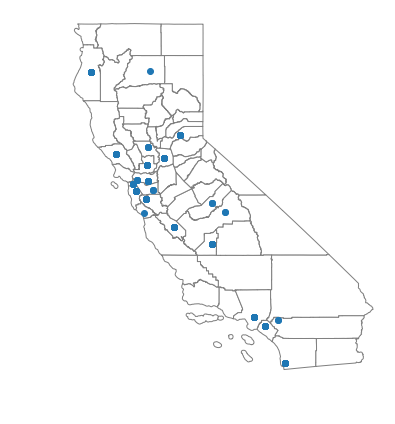

In [25]:
ax = cal.plot(figsize=(20,7), color='white', edgecolor='gray')
ax.set_axis_off()
california.to_crs(epsg=3857).plot(ax=ax);